In [68]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [69]:
#Part One: Exploratory Data Analysis (EDA): 

In [70]:
dataset = pd.read_csv("/Users/xuehuawu/Desktop/weather-data.csv")
dataset.head() #Show the first five result

,station,valid,tmpc,dwpc,relh,sknt,gust,peak_wind_drct
0,NZAA,2015-01-01 00:00,21.0,11.0,52.77,15.0,NaN,NaN
1,NZAA,2015-01-01 00:30,21.0,10.0,49.37,16.0,NaN,NaN
2,NZAA,2015-01-01 01:00,21.0,12.0,56.38,16.0,NaN,NaN
3,NZAA,2015-01-01 01:30,21.0,13.0,60.21,16.0,NaN,NaN
4,NZAA,2015-01-01 02:00,21.0,12.0,56.38,16.0,NaN,NaN


In [71]:
# Mean - Average value of tmpc,dwpc,relh,sknt,gust and pead_wind_drct are 15.811503,12.115772,79.782307,8.919029,30.962594 and NaN. 
# The std (Standard Deviation) of tmpc,dwpc,relh,sknt,gust and pead_wind_drct are 4.235197,3.738005,12.562199,5.348379,6.319510 and NaN.
# 25% - The 25th percentile value of tmpc,dwpc,relh,sknt,gust and pead_wind_drct are 13.000000,9.000000,71.450000,5.000000,27.000000 and NaN.
# 50% - Median of of tmpc,dwpc,relh,sknt,gust and pead_wind_drct are 16.000000,12.000000,81.990000,8.000000,31.000000 and NaN. 
# 75% - The 75th percentile value of tmpc,dwpc,relh,sknt,gust and pead_wind_drct are 19.000000,15.000000,88.180000,12.000000,35.000000 and NaN.
dataset.describe()



,tmpc,dwpc,relh,sknt,gust,peak_wind_drct
count,103678.000000,103678.000000,103593.000000,103704.000000,1203.000000,0.0
mean,15.811503,12.115772,79.782307,8.919029,30.962594,NaN
std,4.235197,3.738005,12.562199,5.348379,6.319510,NaN
min,2.000000,-2.000000,29.230000,0.000000,13.000000,NaN
25%,13.000000,9.000000,71.450000,5.000000,27.000000,NaN
50%,16.000000,12.000000,81.990000,8.000000,31.000000,NaN
75%,19.000000,15.000000,88.180000,12.000000,35.000000,NaN
max,29.000000,23.000000,100.000000,42.000000,56.000000,NaN


In [72]:
# Check that there are no null-values.
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103713 entries, 0 to 103712
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0    station        103713 non-null  object 
 1   valid           103713 non-null  object 
 2   tmpc            103678 non-null  float64
 3   dwpc            103678 non-null  float64
 4   relh            103593 non-null  float64
 5   sknt            103704 non-null  float64
 6   gust            1203 non-null    float64
 7   peak_wind_drct  0 non-null       float64
dtypes: float64(6), object(2)
memory usage: 6.3+ MB


<AxesSubplot:>

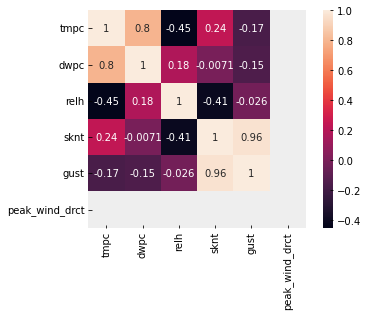

In [73]:
# Values nearing one or negative one can have a pattern where a(x) = k*b(x)
# Values closer to the 0 value indicates the plot of a(x) and b(x) has no noticeable pattern.
# The correlation between dwpc and tmpc are 0.8 which can have a pattern where a(x) = k*b(x).
# The correlation between gust and tmpc are 0.96 which can have a pattern where a(x) = k*b(x).
# The correlation between relh and dwpc are 0.18 which indicates the plot of a(x) and b(x) has no noticeable pattern.
sns.heatmap(dataset.corr(), annot=True, square=True)

/var/folders/jp/1ppbltt92pxck492jjj3gs3h0000gn/T/ipykernel_49322/3665301553.py:23: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


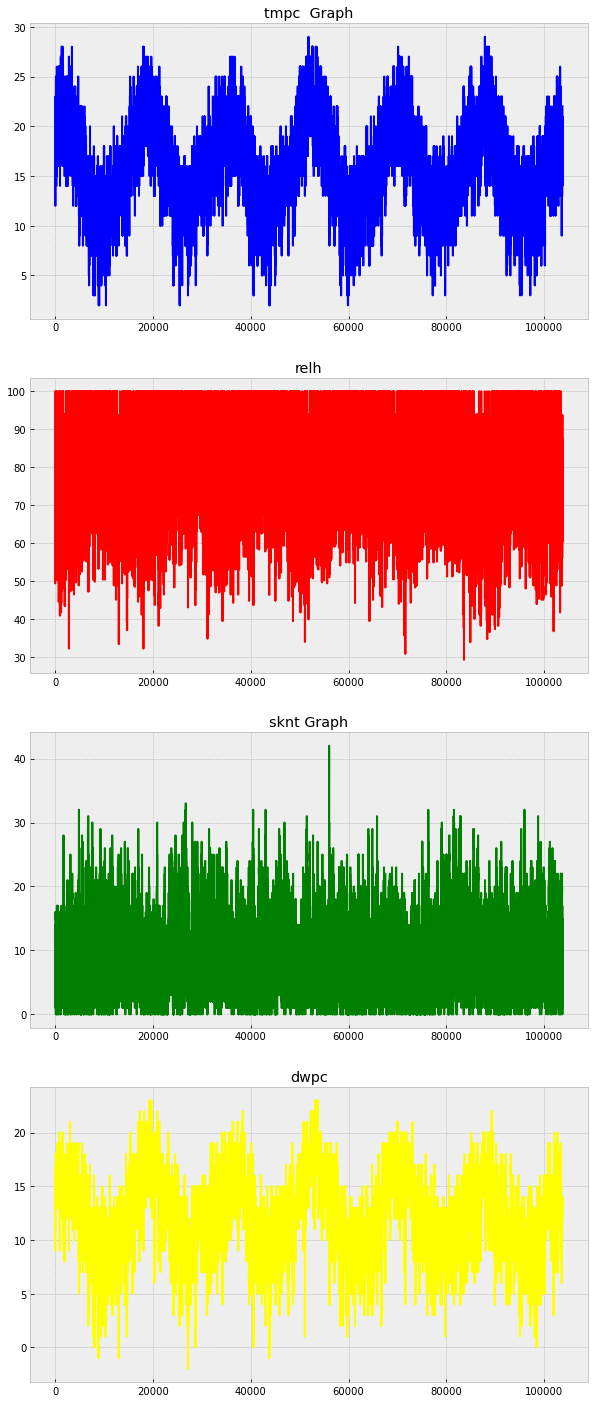

In [74]:
plt.style.use("bmh")
fig, (ax1,ax2,ax3,ax4) = plt.subplots(nrows=4, ncols=1, squeeze=True)

#  The plot shows tmpc changed over time. 
ax1.plot(dataset["tmpc"], color="blue")
ax1.set_title("tmpc  Graph")


#  The plot shows relh changed over time. 
ax2.plot(dataset["relh"], color="red")
ax2.set_title("relh")

#  The plot shows sknt changed over time. 
ax3.plot(dataset["sknt"], color="green")
ax3.set_title("sknt Graph")


#  The plot shows dwpc changed over time. 
ax4.plot(dataset["dwpc"], color="yellow")
ax4.set_title("dwpc")

fig.set_size_inches(10,25)
fig.show()


In [75]:
# Part Two Data Preparation:

In [76]:
# We drop gust and peak_wind_drct columns because there are two many NA value.
dataset.drop(columns=["gust", "peak_wind_drct"], inplace=True)
dataset.head() # Show the first five results.


,station,valid,tmpc,dwpc,relh,sknt
0,NZAA,2015-01-01 00:00,21.0,11.0,52.77,15.0
1,NZAA,2015-01-01 00:30,21.0,10.0,49.37,16.0
2,NZAA,2015-01-01 01:00,21.0,12.0,56.38,16.0
3,NZAA,2015-01-01 01:30,21.0,13.0,60.21,16.0
4,NZAA,2015-01-01 02:00,21.0,12.0,56.38,16.0


In [77]:
# 35 Null value in tmpc, 35 Null value in relh, 120 NUll value in relh, and 9 NUll in sknt 
print(dataset.isnull().sum())

 station      0
valid         0
tmpc         35
dwpc         35
relh        120
sknt          9
dtype: int64


In [78]:
#remove row which included Null value. 
updated_df = dataset.dropna(axis=0)

print(updated_df.isnull().sum()) #all variable don't have null value. 

 station    0
valid       0
tmpc        0
dwpc        0
relh        0
sknt        0
dtype: int64


In [79]:
updated_df.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103584 entries, 0 to 103712
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0    station  103584 non-null  object 
 1   valid     103584 non-null  object 
 2   tmpc      103584 non-null  float64
 3   dwpc      103584 non-null  float64
 4   relh      103584 non-null  float64
 5   sknt      103584 non-null  float64
dtypes: float64(4), object(2)
memory usage: 5.5+ MB


In [80]:
updated_df.head()

,station,valid,tmpc,dwpc,relh,sknt
0,NZAA,2015-01-01 00:00,21.0,11.0,52.77,15.0
1,NZAA,2015-01-01 00:30,21.0,10.0,49.37,16.0
2,NZAA,2015-01-01 01:00,21.0,12.0,56.38,16.0
3,NZAA,2015-01-01 01:30,21.0,13.0,60.21,16.0
4,NZAA,2015-01-01 02:00,21.0,12.0,56.38,16.0


In [81]:
from datetime import datetime


In [82]:
date_string = pd.to_datetime(updated_df['valid'])

updated_dfnew =updated_df.assign(valid = date_string)
# create four columns in the dataset, which prepare to create Data Modelling. 
updated_dfnew['year'] = pd.DatetimeIndex(updated_dfnew['valid']).year
updated_dfnew['month'] = pd.DatetimeIndex(updated_dfnew['valid']).month
updated_dfnew['day'] = pd.DatetimeIndex(updated_dfnew['valid']).day
updated_dfnew['hour'] = pd.DatetimeIndex(updated_dfnew['valid']).hour
updated_dfnew['minutes'] = pd.DatetimeIndex(updated_dfnew['valid']).minute
updated_dfnew.head()

,station,valid,tmpc,dwpc,relh,sknt,year,month,day,hour,minutes
0,NZAA,2015-01-01 00:00:00,21.0,11.0,52.77,15.0,2015,1,1,0,0
1,NZAA,2015-01-01 00:30:00,21.0,10.0,49.37,16.0,2015,1,1,0,30
2,NZAA,2015-01-01 01:00:00,21.0,12.0,56.38,16.0,2015,1,1,1,0
3,NZAA,2015-01-01 01:30:00,21.0,13.0,60.21,16.0,2015,1,1,1,30
4,NZAA,2015-01-01 02:00:00,21.0,12.0,56.38,16.0,2015,1,1,2,0


In [83]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np

In [84]:
trainX, testX, trainY, testY = train_test_split(updated_dfnew[["year","month","day","hour","minutes"]],updated_dfnew[["tmpc", "dwpc","relh","sknt"]], random_state=0)

In [85]:
#Part three: Data Modelling

In [86]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestRegressor

In [87]:
# We use RandomForest for this model. 
clf = RandomForestRegressor()

# We use RandomForest to fit the train dataset model. 
clf.fit(trainX, trainY)

RandomForestRegressor()

In [93]:
# The score for the model is pretty good.
clf.score(testX,testY)

0.8718397454274105

In [94]:

# Another month of the existing dataset predicted.
predictions = clf.predict(testX)
predictions

array([[18.56  , 17.96  , 96.4222,  7.32  ],
       [17.46  , 15.12  , 86.4042,  6.5   ],
       [ 6.05  ,  4.94  , 92.6195,  1.7   ],
       ...,
       [20.99  , 16.05  , 73.6764, 10.92  ],
       [17.95  , 13.79  , 77.2832, 12.18  ],
       [18.02  , 15.73  , 86.6176,  7.71  ]])

In [95]:

#The Mean Absolute Error of data for each variable 
errors = abs(predictions - testY)
round(np.mean(errors),2) # Mean Absolute Error:

/Users/xuehuawu/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


tmpc    0.61
dwpc    0.73
relh    3.86
sknt    1.76
dtype: float64

In [120]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / testY)
mape.head()



#Calculate and display accuracy of data for each variable
accuracy = 100 - np.mean(mape) 
round(accuracy, 2)



/Users/xuehuawu/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


tmpc    95.68
dwpc     -inf
relh    94.96
sknt     -inf
dtype: float64

In [92]:
# We use Random Forest to fit this training dataset. And the score of the test is 0.8718397454274105 which means the fitted model is pretty good.
# We use testX to predict another month's weather. We calculate the Mean Absolute Error of data for each variable. 
# The mean Mean Absolute Error of tmpc,dwpc, and sknt are small which means the error between prediction and actual are small. 
# The accuracy of tmpc and relh are 95.68% and 94.96%, which means the Our model has learned how to predict the tmpc and sknt for the next day with 95.68% and 94.96% accuracy.

